# **Machine Learning App in R**

## **Brian J. Ault**

### **Load The Data**

In [2]:
# attach the iris dataset to the environment
data(iris)
# rename the dataset
dataset <- iris

In [3]:
# define the filename
filename <- "iris.csv"
# load the CSV file from the local directory
dataset <- read.csv(filename, header=FALSE)
# set the column names in the dataset
colnames(dataset) <- c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species")

### **Create a Validation Dataset**

In [4]:
# install.packages("caret")
library(caret)

# Assuming 'dataset' is your original dataset

# Set seed for reproducibility
set.seed(123)

# Create an index to split the data
validation_index <- createDataPartition(dataset$Species, p = 0.80, list = FALSE)

# Create training and validation datasets
training <- dataset[validation_index, ]  # 80% of original dataset
validation <- dataset[-validation_index, ]  # 20% of original dataset

Loading required package: ggplot2

Loading required package: lattice

Warning message in createDataPartition(dataset$Species, p = 0.8, list = FALSE):
“Some classes have a single record ( name ) and these will be selected for the sample”


### **Summarize Dataset**

In [30]:
# dimensions of dataset
dim(dataset)

[1] 151   5

In [31]:
# list types for each attribute
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
 "character"  "character"  "character"  "character"  "character"

In [32]:
# take a peek at the first 5 rows of the data
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<chr>,<chr>,<chr>,<chr>,<chr>
1,sepal_length,sepal_width,petal_length,petal_width,name
2,5.1,3.5,1.4,0.2,setosa
3,4.9,3.0,1.4,0.2,setosa
4,4.7,3.2,1.3,0.2,setosa
5,4.6,3.1,1.5,0.2,setosa
6,5.0,3.6,1.4,0.2,setosa


In [33]:
# list the levels for the class
levels(dataset$Species)

NULL

In [34]:
# summarize the class distribution
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
name,1,0.6622517
setosa,50,33.1125828
versicolor,50,33.1125828
virginica,50,33.1125828


In [35]:
# summarize attribute distributions
summary(dataset)

 Sepal.Length       Sepal.Width        Petal.Length       Petal.Width       
 Length:151         Length:151         Length:151         Length:151        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
   Species         
 Length:151        
 Class :character  
 Mode  :character  

### **Visualize Dataset**

In [36]:
# split input and output
x <- dataset[,1:4]
y <- dataset[,5]

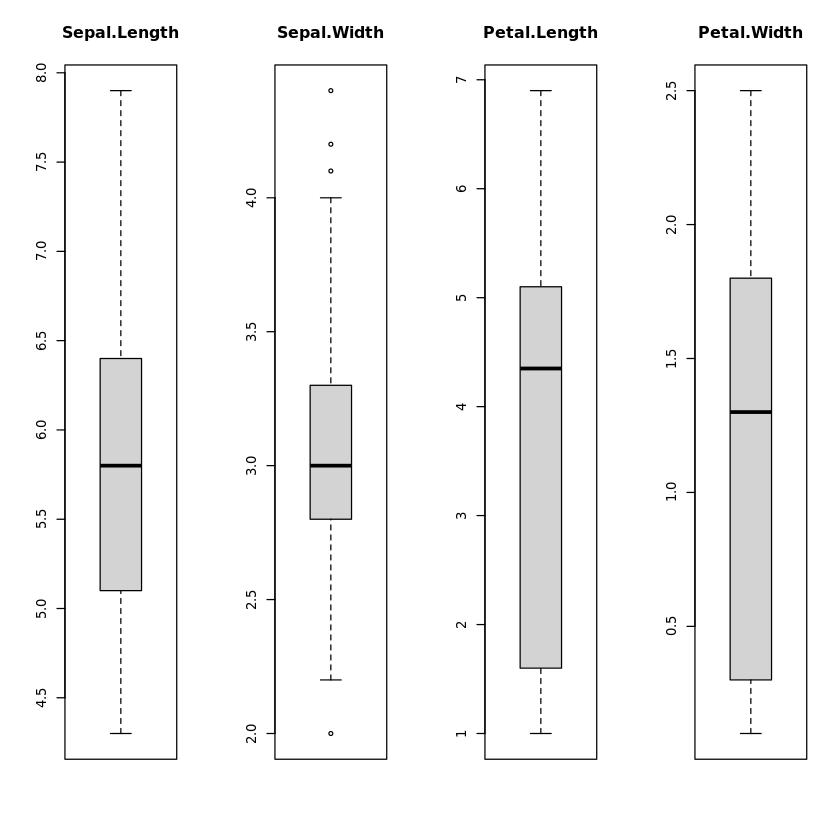

In [37]:
# Load the iris dataset (if not already loaded)
data(iris)

# Set up the layout for the plots (1 row, 4 columns)
par(mfrow=c(1,4))

# Create boxplots for each attribute (columns 1 to 4) in the iris dataset
for(i in 1:4) {
  boxplot(iris[, i], main = names(iris)[i])
}

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“NAs introduced by coercion”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”


ERROR: Error in plot.window(...): need finite 'ylim' values


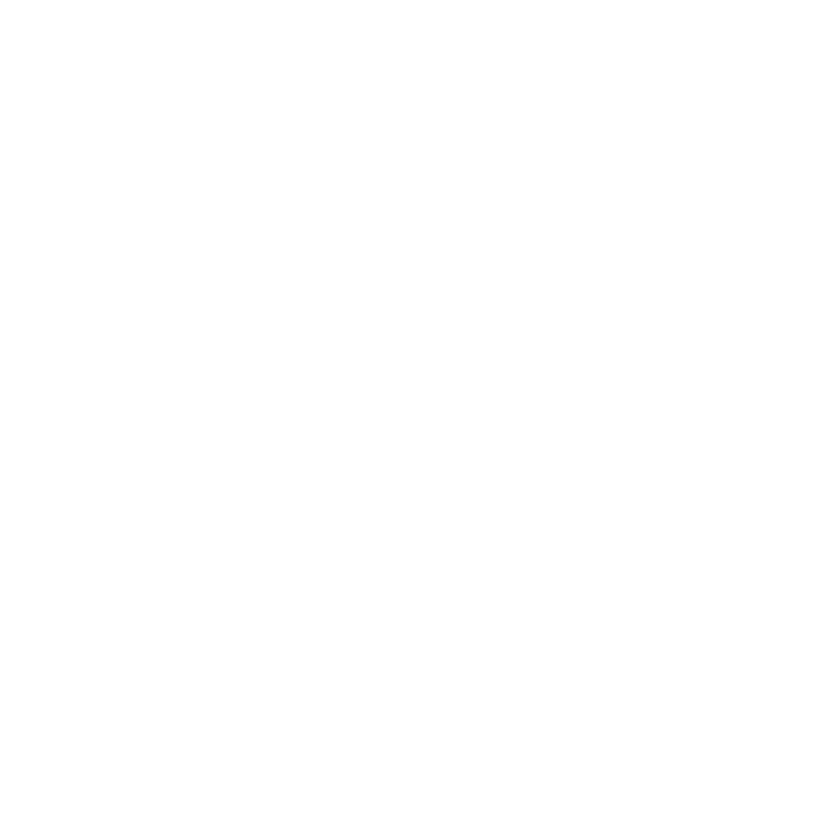

In [43]:
# barplot for class breakdown
plot(y)